In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## California Housing dataset

Source: https://www.kaggle.com/camnugent/california-housing-prices

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
773,-122.11,37.66,36.0,1755.0,316.0,913.0,299.0,4.1302,172700.0,NEAR BAY
16144,-122.47,37.78,52.0,2275.0,412.0,1166.0,424.0,4.0652,421300.0,NEAR BAY
7644,-118.27,33.82,37.0,943.0,218.0,803.0,216.0,5.2287,191100.0,<1H OCEAN
6652,-118.14,34.15,17.0,1896.0,674.0,971.0,652.0,0.8438,175000.0,<1H OCEAN
17876,-121.99,37.39,25.0,3495.0,834.0,2484.0,797.0,4.8145,230700.0,<1H OCEAN


### Exploratory Data Analysis

In [3]:
housing_data.shape

(20640, 10)

In [4]:
housing_data = housing_data.dropna()
housing_data.shape

(20433, 10)

In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Visualizing relationships

Text(0, 0.5, 'Median house value')

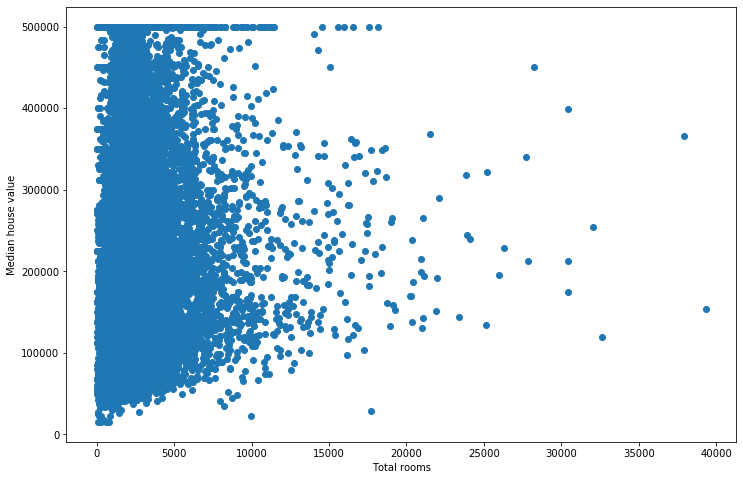

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(housing_data['total_rooms'], housing_data['median_house_value'])

plt.xlabel('Total rooms')
plt.ylabel('Median house value')

Text(0, 0.5, 'Median house value')

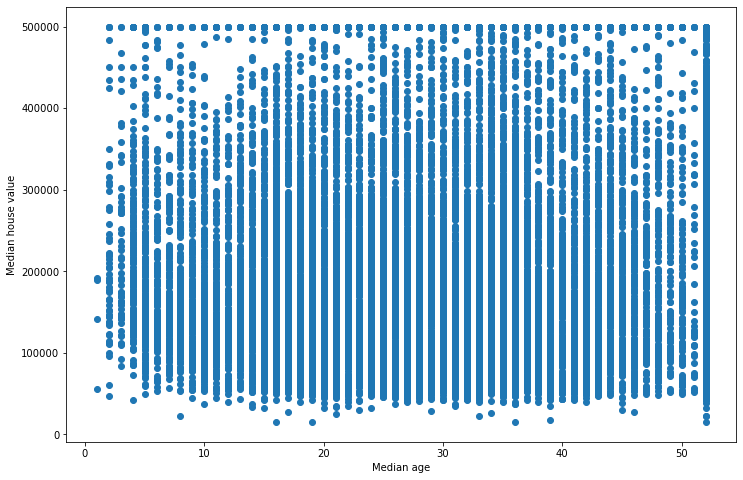

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(housing_data['housing_median_age'], housing_data['median_house_value'])

plt.xlabel('Median age')
plt.ylabel('Median house value')

Text(0, 0.5, 'Median house value')

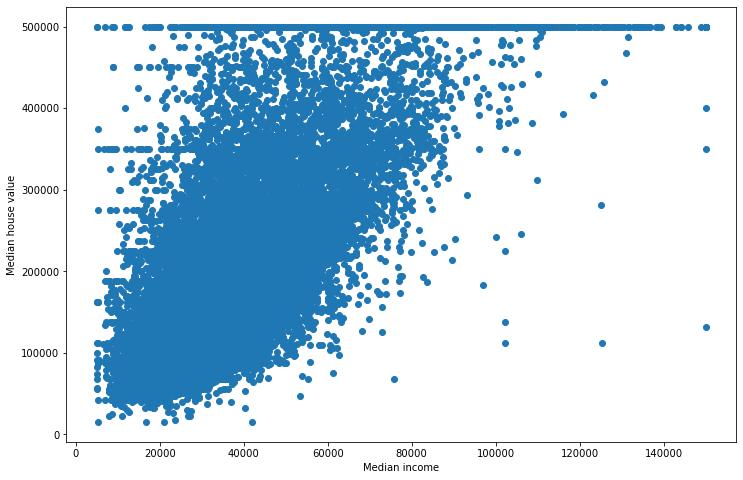

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(housing_data['median_income'] * 10000, housing_data['median_house_value'])

plt.xlabel('Median income')
plt.ylabel('Median house value')

In [10]:
housing_data_corr = housing_data.corr()
housing_data_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


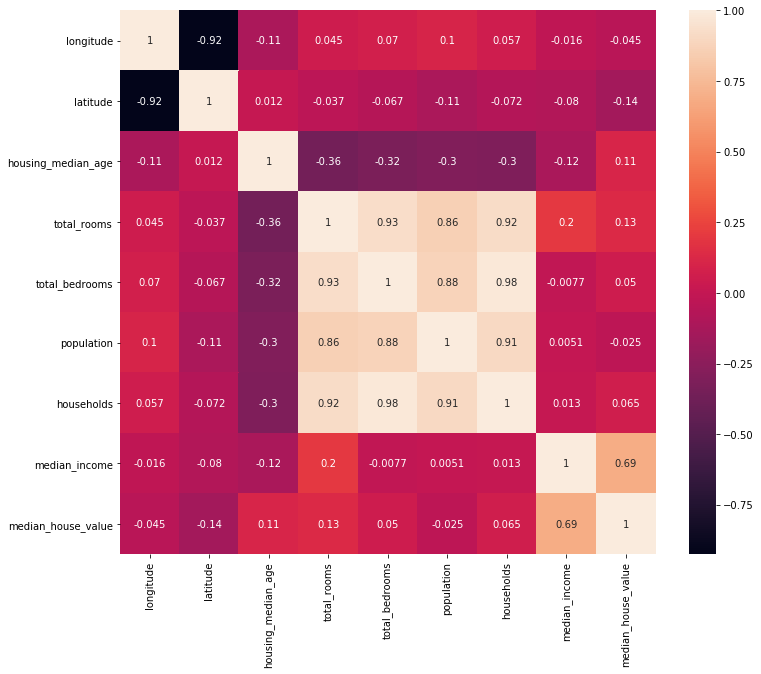

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(housing_data_corr, annot=True)

### Data Wrangling

In [12]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [13]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [14]:
housing_data.shape

(19475, 10)

In [15]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [18]:
housing_data.shape

(19475, 14)

In [19]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12929,-121.21,38.66,15.0,6940.0,1019.0,2829.0,990.0,5.4889,232300.0,0,1,0,0,0
18941,-122.07,38.27,8.0,6761.0,1234.0,3237.0,1177.0,4.3586,173400.0,0,1,0,0,0
13150,-121.47,36.92,27.0,2049.0,417.0,1230.0,336.0,4.6477,265900.0,0,1,0,0,0
1169,-121.58,39.52,25.0,2409.0,490.0,1384.0,479.0,1.9956,58000.0,0,1,0,0,0
973,-121.88,37.66,29.0,2702.0,680.0,1360.0,642.0,3.1127,233000.0,0,1,0,0,0


### Linear Regression For Price Prediction

In [20]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [21]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [24]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [25]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True, fit_intercept=False).fit(x_train, y_train)

In [26]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.6132391528020771


In [27]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [28]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND       -2.077862e+06
ocean_proximity_NEAR BAY     -2.045927e+06
ocean_proximity_<1H OCEAN    -2.039162e+06
ocean_proximity_NEAR OCEAN   -2.034410e+06
ocean_proximity_ISLAND       -1.926792e+06
longitude                    -2.379429e+04
latitude                     -2.182825e+04
population                   -2.973148e+01
total_rooms                  -7.926310e+00
households                    4.931110e+01
total_bedrooms                8.857412e+01
housing_median_age            9.299454e+02
median_income                 3.868055e+04
dtype: float64


In [29]:
y_pred = linear_model.predict(x_test)

In [30]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
8069,233235.414401,425500.0
4482,131296.598844,137500.0
19140,234650.291266,258100.0
16306,159963.723304,173300.0
3854,205896.140065,210000.0
19675,118573.505403,110700.0
1,402849.591681,358500.0
10321,268077.666380,266000.0
16201,75833.172840,52000.0
11249,196669.238748,162500.0


In [31]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6111288825140193


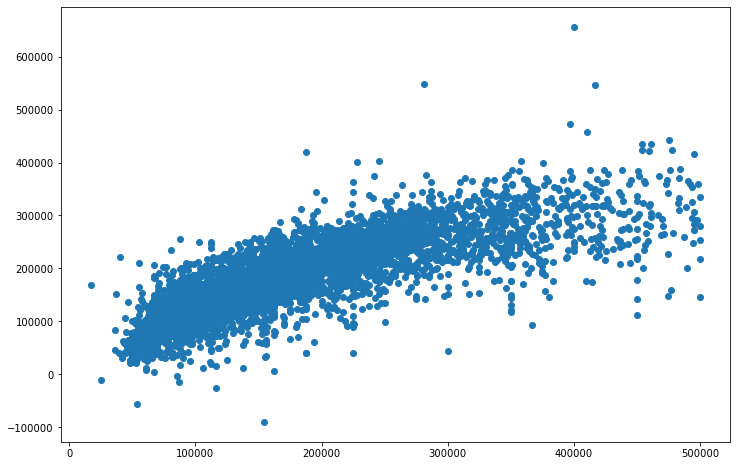

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()

In [33]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [34]:
df_pred_actual_sample.head()

,index,predicted,actual
0,8892,249068.730035,350000.0
1,8041,232004.770499,218800.0
2,11627,372071.395134,398800.0
3,6601,191614.726174,154900.0
4,15363,274856.894330,331300.0


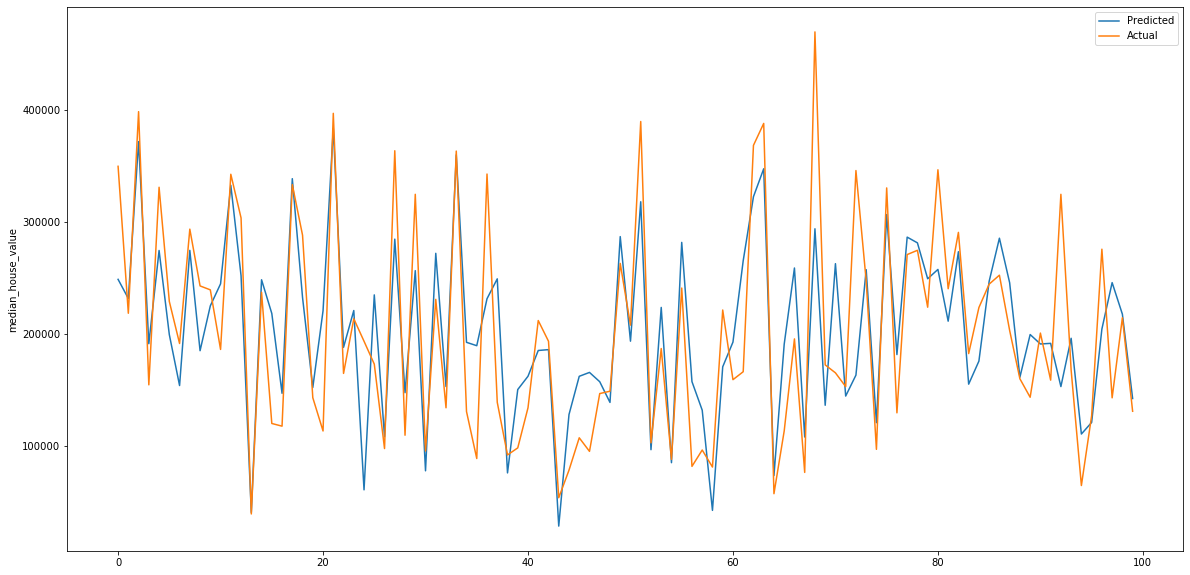

In [35]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()

### Logistic Regression For Price Classification

In [36]:
median = housing_data['median_house_value'].median()
median

173800.0

In [37]:
housing_data['above_median'] = (housing_data['median_house_value'] - median) > 0

In [38]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,above_median
6819,-118.09,34.09,40.0,855.0,208.0,745.0,222.0,3.0125,224000.0,1,0,0,0,0,True
12793,-121.45,38.64,23.0,1481.0,343.0,1079.0,315.0,1.8670,60600.0,0,1,0,0,0,False
7184,-118.17,34.04,44.0,691.0,155.0,613.0,142.0,1.9667,133900.0,1,0,0,0,0,False
6935,-118.09,34.01,31.0,1108.0,238.0,1151.0,229.0,4.3333,149500.0,1,0,0,0,0,False
15191,-117.05,33.02,18.0,917.0,121.0,388.0,131.0,6.3517,260100.0,1,0,0,0,0,True


In [39]:
X = housing_data.drop(['median_house_value', 'above_median'], axis=1)
Y = housing_data['above_median']

In [40]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [42]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [43]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [44]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [45]:
print("Training_score : " , logistic_model.score(x_train, y_train))

Training_score :  0.8187419768934532


In [46]:
y_pred = logistic_model.predict(x_test)

In [47]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
6187,True,False
12195,False,False
16172,True,True
8018,True,True
14223,True,True
3177,False,False
7013,True,False
8989,True,True
18837,False,False
10299,True,True


In [48]:
from sklearn.metrics import accuracy_score

print("Testing_score : ", accuracy_score(y_test, y_pred))

Testing_score :  0.82798459563543
